# Steam-Methane Reforming

Steam Methane Reforming (SMR) Reaction (800-870C and 20-30 atm):

$CH_4 + H_2O \rightarrow 3H_2 + CO, \Delta H^{\circ} = 225.4$ kJ/mol

Water Gas Shift (WGS) Reaction:

$CO + H_2O \rightarrow H_2 + CO_2, \Delta H^{\circ} = -42$ kJ/mol

<cite data-cite="6356110/MUGW5263"></cite>
https://linkinghub.elsevier.com/retrieve/pii/B9780444641274000148

In [14]:
mh2 = 1  # hydrogen mass [kg]
Mh = 1.008  # hydrogen molar mass [g/mol]
nomolh2 = mh2*1e3/2/Mh  # number of h2 mols
nomolh2

496.031746031746

In [15]:
dG = 225.4  # E[kJ/mol] required to split the H2O molecule
SE = dG * nomolh2  # E[kJ] to produce 1kg of H2
SE = SE/3600  # E [kWh]
SE

31.0570987654321

### Mass Balance

In [16]:
mw = 1  # mass of water [kg]
Mw = 18.0153  # water molar mass [g/mol]
nomolw = mw*1e3/Mw  # Number of mols of H_2O

Mc = 16.04  # ch4 molar mass [g/mol]
mc = nomolw*Mc/1e3  # ch4 mass [kg]

print("CH4 mass: ", mc)

nomolh2 = 3*nomolw  # Number of mols of H_2 produced
nomolco = nomolw  # Number of mols of CO produced

nomolh2 = nomolh2 + nomolco  # Number of mols produced after both reactions
mh = nomolh2*Mh/1e3

print("Hydrogen mass: ", mh)

mw = mw + nomolco*Mw/1e3  # mass of water
print("Water mass: ", mw)

CH4 mass:  0.8903543099476555
Hydrogen mass:  0.22380976170255285
Water mass:  2.0


In [17]:
mw = mw/mh
print("mass of water required for 1kg of Hydrogen: ", mw, "kg")

mass of water required for 1kg of Hydrogen:  8.936160714285714 kg


That's the thermal energy required to do the chemical conversion, we need to add the thermal energy to produce the steam.

What's the steam pressure and temperature necessary for the steam methane reforming?
P = 20-30 atm, P$_{ave}$ = 25 atm = 2.53 MPa, T = 900 C

Text(0.5,0,'Temperature [$^\\circ$C]')

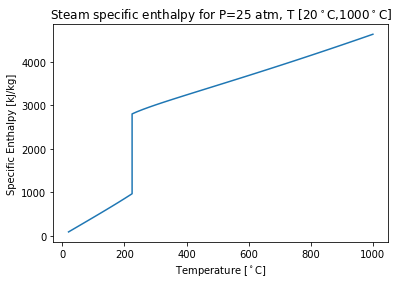

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# to produce 1 kg of H2 we need 'mw' kg of steam
df1 = pd.read_csv("steam-properties-P25atm.csv")
plt.plot(df1['Temperature(C)'], df1['Enthalpy(kJ/kg)'])
plt.title('Steam specific enthalpy for P=25 atm, T [20$^\circ$C,1000$^\circ$C]')
plt.ylabel('Specific Enthalpy [kJ/kg]')
plt.xlabel('Temperature [$^\circ$C]')

In [23]:
mh = 1
hin = df1[df1['Temperature(C)'] == 20]['Enthalpy(kJ/kg)'].values.tolist()[0]
hou = df1[df1['Temperature(C)'] == 900]['Enthalpy(kJ/kg)'].values.tolist()[0]
e = hou-hin  # kJ/kg of steam
e = e/3600  # kWh/kg of steam
E = e*mw  # kWh/kg of H2
E = E/0.85  # kWh/kg of H2 Boiler efficiency
ET = E + SE  # kWh
ET = ET * mh
print("Energy required to produce ",mh,"kg of H2: ", ET, "kWh")

Energy required to produce  1 kg of H2:  43.622938141453346 kWh


In [24]:
Eg = 1e5 # [Btu/therm], 1 therm = 97.84 cubic feet
Eg = Eg / 3412.14  # [kwh/therm]
Eg = Eg * 0.857  # boiler efficiency, assumes that has feedwater economizer or air preheaters
print("Natural gas therms required: ", ET/Eg)

Natural gas therms required:  1.7368444824968334


Natural gas cost: $3.88/thousand cubic feet

https://www.eia.gov/dnav/ng/ng_pri_sum_dcu_nus_m.htm

In [27]:
print("Cost of natural gas per kg of H2: $", 3.88*ET/Eg*97.84/1e3)

Cost of natural gas per kg of H2: $ 0.6593395129698618


This number seems to be pretty low. According to: https://www.energy.gov/sites/prod/files/2017/11/f46/HPTT%20Roadmap%20FY17%20Final_Nov%202017.pdf the price should be between $1.2 - 1.5/kg.

# Real numbers:

Air Liquide:
https://www.engineering-airliquide.com/steam-methane-reforming-hydrogen-production

E = 12.3 - 13.2 MJ/Nm$^3$
Steam production = 0.4 - 1.2 kg/Nm3
Capacity = 10e3 - 200e3 Nm3/h (small plants: 10e3 - 40e3 Nm3/h)

In [28]:
E = (12.3+13.2)/2*1e3  # [kJ/Nm3]
E = E/3600/0.084  #kWh/kg
print("Specific energy: ", E, "kWh/kg H2")

Specific energy:  42.16269841269841 kWh/kg H2


In [29]:
w = (0.4+1.2)/2  #kg/Nm3 H2
w = w/0.084
print("Water mass necessary: ", w, "kg/kg H2")

Water mass necessary:  9.523809523809524 kg/kg H2


In [30]:
cap = 40e3  # Nm3/h
cap = cap*0.084  #kg/h
print(cap, "kg of H2/h")

3360.0 kg of H2/h


## Carbon capture sequestration (CCS)

* Capture of CO2
* Transport the captured and compressed CO2 (usually pipelines)
* Underground injection and geologic sequestration of the CO2 into deep underground rock formations.

https://19january2017snapshot.epa.gov/climatechange/carbon-dioxide-capture-and-sequestration-overview_.html

$120 - $140/ton of CO2.
- It will add 16.8 - 19.6 cents/kWh to the cost of coal generation
- 9.5 - 11 cents/kWh to the cost of natural gas generation

https://cleantechnica.com/2016/01/19/carbon-capture-expensive-physics/

Hard Coal: 1.142 kgCo2/kWh
Natural gas: 0.572 kgCo2/kWh

https://www.wingas.com/fileadmin/Wingas/WINGAS-Studien/Energieversorgung_und_Energiewende_en.pdf


In [4]:
pc = 120/1e3  # $/ton of CO2
pc *= 1.142
print(pc, "$/kWh")

pn = 120/1e3  # $/ton of CO2
pn *= 0.57
print(pn, "$/kWh")

0.13704 $/kWh
0.06839999999999999 $/kWh
